In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
#The data is written in a CSV file, so we're going to use Pandas function to read CSV file.
df = pd.read_csv('goodreads_dataset/Good_Reads_Book_Awards_Crawl_2023_12_27_11_14.csv')

In [3]:
df.sample(5)

,source_URL,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,Book Description,First Published date,Kindle Version and Price,Kindle Price,About the Author
202,https://www.goodreads.com/book/show/61246258-p...,29199,Debut Novel,Pineapple Street,Jenny Jackson,3.60,"115,446","10,917",304,Hardcover,"Darley, the eldest daughter in the well-connec...",7-Mar-23,Kindle $14.99,14.99,NaN
201,https://www.goodreads.com/book/show/62854842-i...,32924,Debut Novel,Ink Blood Sister Scribe,Emma Törzs,4.07,"23,901","3,906",416,Hardcover,"In this spellbinding debut novel, two estrange...",30-May-23,Kindle $14.99,14.99,"EMMA TÖRZS is a writer, teacher, and occasiona..."
85,https://www.goodreads.com/book/show/73071451-t...,13061,Romantasy,Throne of the Fallen,Kerri Maniscalco,4.20,"12,861","2,201",627,Kindle Edition,Sinner. Villain. Wicked. The Prince of Envy ha...,3-Oct-23,Kindle $14.99,14.99,I'm mostly on instagram--where I'm always read...
235,https://www.goodreads.com/book/show/65214406-p...,2851,Nonfiction,Punished for Dreaming: How School Reform Harms...,Bettina L. Love,4.44,376,99,352,Hardcover,“I am an eighties baby who grew to hate school...,12-Sep-23,Kindle $14.99,14.99,NaN
267,https://www.goodreads.com/book/show/61327450-p...,11244,History & Biography,Pathogenesis: A History of the World in Eight ...,Jonathan Kennedy,3.99,"3,186",530,304,Hardcover,An account of how the major transformations in...,18-Apr-23,Kindle $13.99,13.99,Jonathan Kennedy teaches politics and global h...


In [4]:
df.info()
df.drop(['source_URL', 'Book Description', 'About the Author'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   source_URL                299 non-null    object 
 1   Readers Choice Votes      299 non-null    int64  
 2   Readers Choice Category   299 non-null    object 
 3   Title                     299 non-null    object 
 4   Author                    299 non-null    object 
 5   Total Avg Rating          299 non-null    float64
 6   Number of Ratings         299 non-null    object 
 7   Number of Reviews         299 non-null    object 
 8   Number of Pages           299 non-null    int64  
 9   Edition                   299 non-null    object 
 10  Book Description          299 non-null    object 
 11  First Published date      299 non-null    object 
 12  Kindle Version and Price  299 non-null    object 
 13  Kindle Price              299 non-null    float64
 14  About the 

In [5]:
numeric_columns = ['Number of Ratings','Number of Reviews']

# Remove the character comma from those columns and convert to Int32
for column in numeric_columns:
    df[column] = df[column].replace(',', '', regex=True).astype('int32')

In [6]:
df['Kindle Version'] = df['Kindle Version and Price'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()
df['Kindle Version'] = df['Kindle Version'].astype('category')

In [55]:
# Find the number of missing values for each column
df.isnull().sum()

Readers Choice Votes        0
Readers Choice Category     0
Title                       0
Author                      0
Total Avg Rating            0
Number of Ratings           0
Number of Reviews           0
Number of Pages             0
Edition                     0
First Published date        0
Kindle Version and Price    0
Kindle Price                0
Kindle Version              0
dtype: int64

In [7]:
df.sample(5)

,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price,Kindle Version
261,22698,History & Biography,"Killing the Witches: The Horror of Salem, Mass...",Bill O'Reilly|Martin Dugard,3.83,4266,511,291,Hardcover,26-Sep-23,Kindle $15.99,15.99,Kindle
139,1337,Science Fiction,The Great Transition,Nick Fuller Googins,3.85,1341,324,352,Hardcover,15-Aug-23,Kindle $14.99,14.99,Kindle
252,3258,Memoir & Autobiography,While You Were Out: An Intimate Family Portrai...,Meg Kissinger,4.31,3845,596,320,Hardcover,5-Sep-23,Kindle $14.99,14.99,Kindle
29,19468,Historical Fiction,Looking for Jane,Heather Marshall,4.38,29873,3669,400,Hardcover,1-Mar-22,Kindle $12.99,12.99,Kindle
101,57818,Fantasy,Tress of the Emerald Sea,Brandon Sanderson|Howard Lyon,4.47,83493,13093,369,Hardcover,10-Jan-23,Kindle $9.99,9.99,Kindle


In [8]:
cat_counts = df['Readers Choice Category'].value_counts()
print(cat_counts)

Readers Choice Category
Fiction                                  20
Historical Fiction                       20
Mystery & Thriller                       20
Romance                                  20
Romantasy                                20
Fantasy                                  20
Science Fiction                          20
Horror                                   20
Young Adult Fantasy & Science Fiction    20
Young Adult Fiction                      20
Nonfiction                               20
History & Biography                      20
Memoir & Autobiography                   20
Humor                                    20
Debut Novel                              19
Name: count, dtype: int64


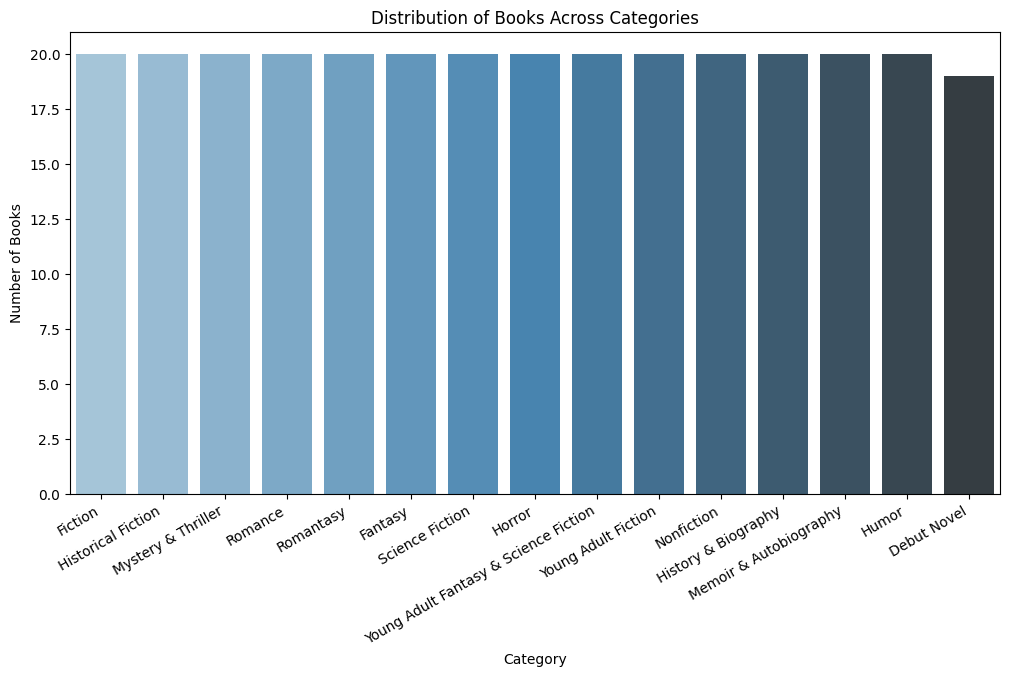

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cat_counts.index, y=cat_counts.values, palette='Blues_d')
plt.title('Distribution of Books Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Books')
plt.xticks(rotation=30, ha='right')
plt.show()

In [10]:
# Determine which column we want to aggregate
aggregations = {
    'Readers Choice Votes': 'sum', 
    'Total Avg Rating': 'mean',
    'Number of Ratings': 'sum',
    'Number of Reviews': 'sum',
    'Number of Pages': 'median',
    'Kindle Price': 'median',
}

# Group by book category
category_vote = df.groupby('Readers Choice Category').agg(aggregations).sort_values('Readers Choice Votes', ascending=False)

# Create new DataFrame of Votes, Ratings, and Reviews
result_df = pd.DataFrame({
    'Avg Ratings': category_vote['Total Avg Rating'].round(2),
    'Number of Ratings': category_vote['Number of Ratings'],
    'Number of Reviews': category_vote['Number of Reviews'],
    'Median Pages': category_vote['Number of Pages'],
    'Median Kindle Price': category_vote['Kindle Price'].round(2)
})

result_df

,Avg Ratings,Number of Ratings,Number of Reviews,Median Pages,Median Kindle Price
Readers Choice Category,,,,,
Romance,4.06,2737676,336747,398.0,6.99
Fiction,3.95,1288841,157445,328.0,14.99
Romantasy,4.07,1387830,203928,506.0,5.49
Mystery & Thriller,4.05,1673792,181312,365.5,14.99
Fantasy,4.10,523942,93625,407.5,14.73
Young Adult Fantasy & Science Fiction,4.04,543467,113098,440.0,10.99
Historical Fiction,4.14,692953,79846,368.0,12.99
Memoir & Autobiography,4.18,814014,99369,298.5,14.99
Young Adult Fiction,3.97,392355,73957,384.0,10.99


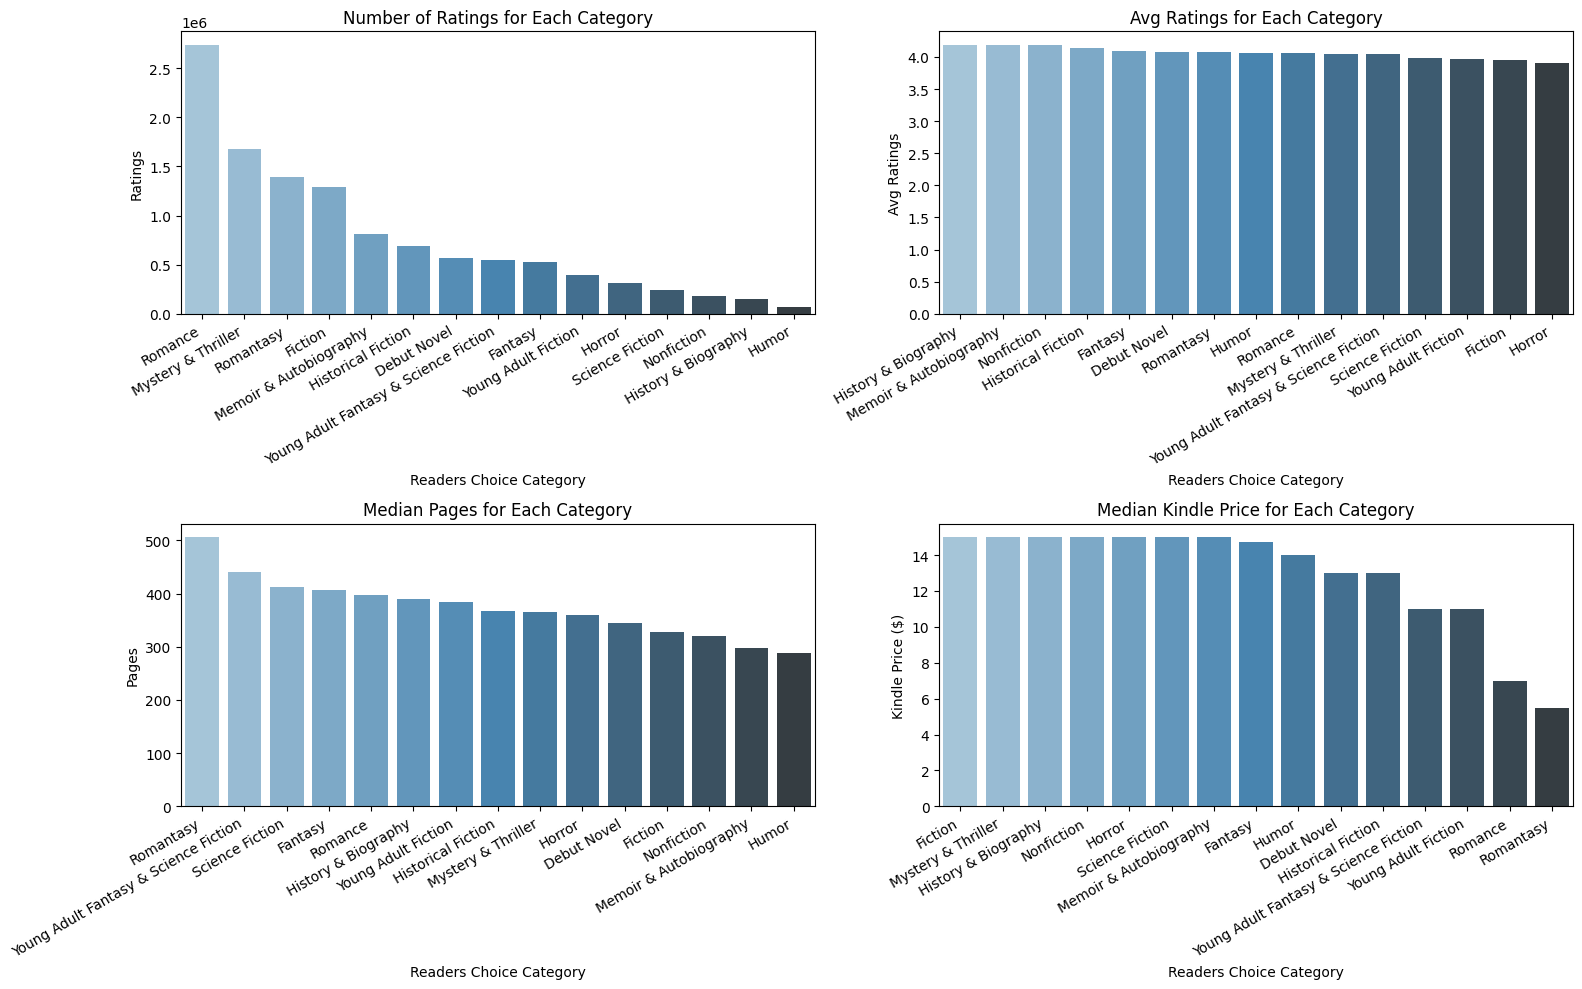

In [11]:
# figsize is (width, height) in inches
fig, axes = plt.subplots(2, 2, figsize=(16, 10), sharey=False)

result_df_sorted = result_df.sort_values(by='Number of Ratings', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Number of Ratings'], palette='Blues_d', order=result_df_sorted.index, ax=axes[0, 0])
axes[0, 0].set_title('Number of Ratings for Each Category')
axes[0, 0].set_ylabel('Ratings')
axes[0, 0].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

result_df_sorted = result_df.sort_values(by='Avg Ratings', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Avg Ratings'], palette='Blues_d', order=result_df_sorted.index, ax=axes[0, 1])
axes[0, 1].set_title('Avg Ratings for Each Category')
axes[0, 1].set_ylabel('Avg Ratings')
axes[0, 1].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

result_df_sorted = result_df.sort_values(by='Median Pages', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Median Pages'], palette='Blues_d', order=result_df_sorted.index, ax=axes[1, 0])
axes[1, 0].set_title('Median Pages for Each Category')
axes[1, 0].set_ylabel('Pages')
axes[1, 0].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

result_df_sorted = result_df.sort_values(by='Median Kindle Price', ascending=False)
sns.barplot(x=result_df_sorted.index, y=result_df_sorted['Median Kindle Price'], palette='Blues_d', order=result_df_sorted.index, ax=axes[1, 1])
axes[1, 1].set_title('Median Kindle Price for Each Category')
axes[1, 1].set_ylabel('Kindle Price ($)')
axes[1, 1].set_xticklabels(labels=result_df_sorted.index, rotation=30, ha='right')

plt.tight_layout()
plt.show()

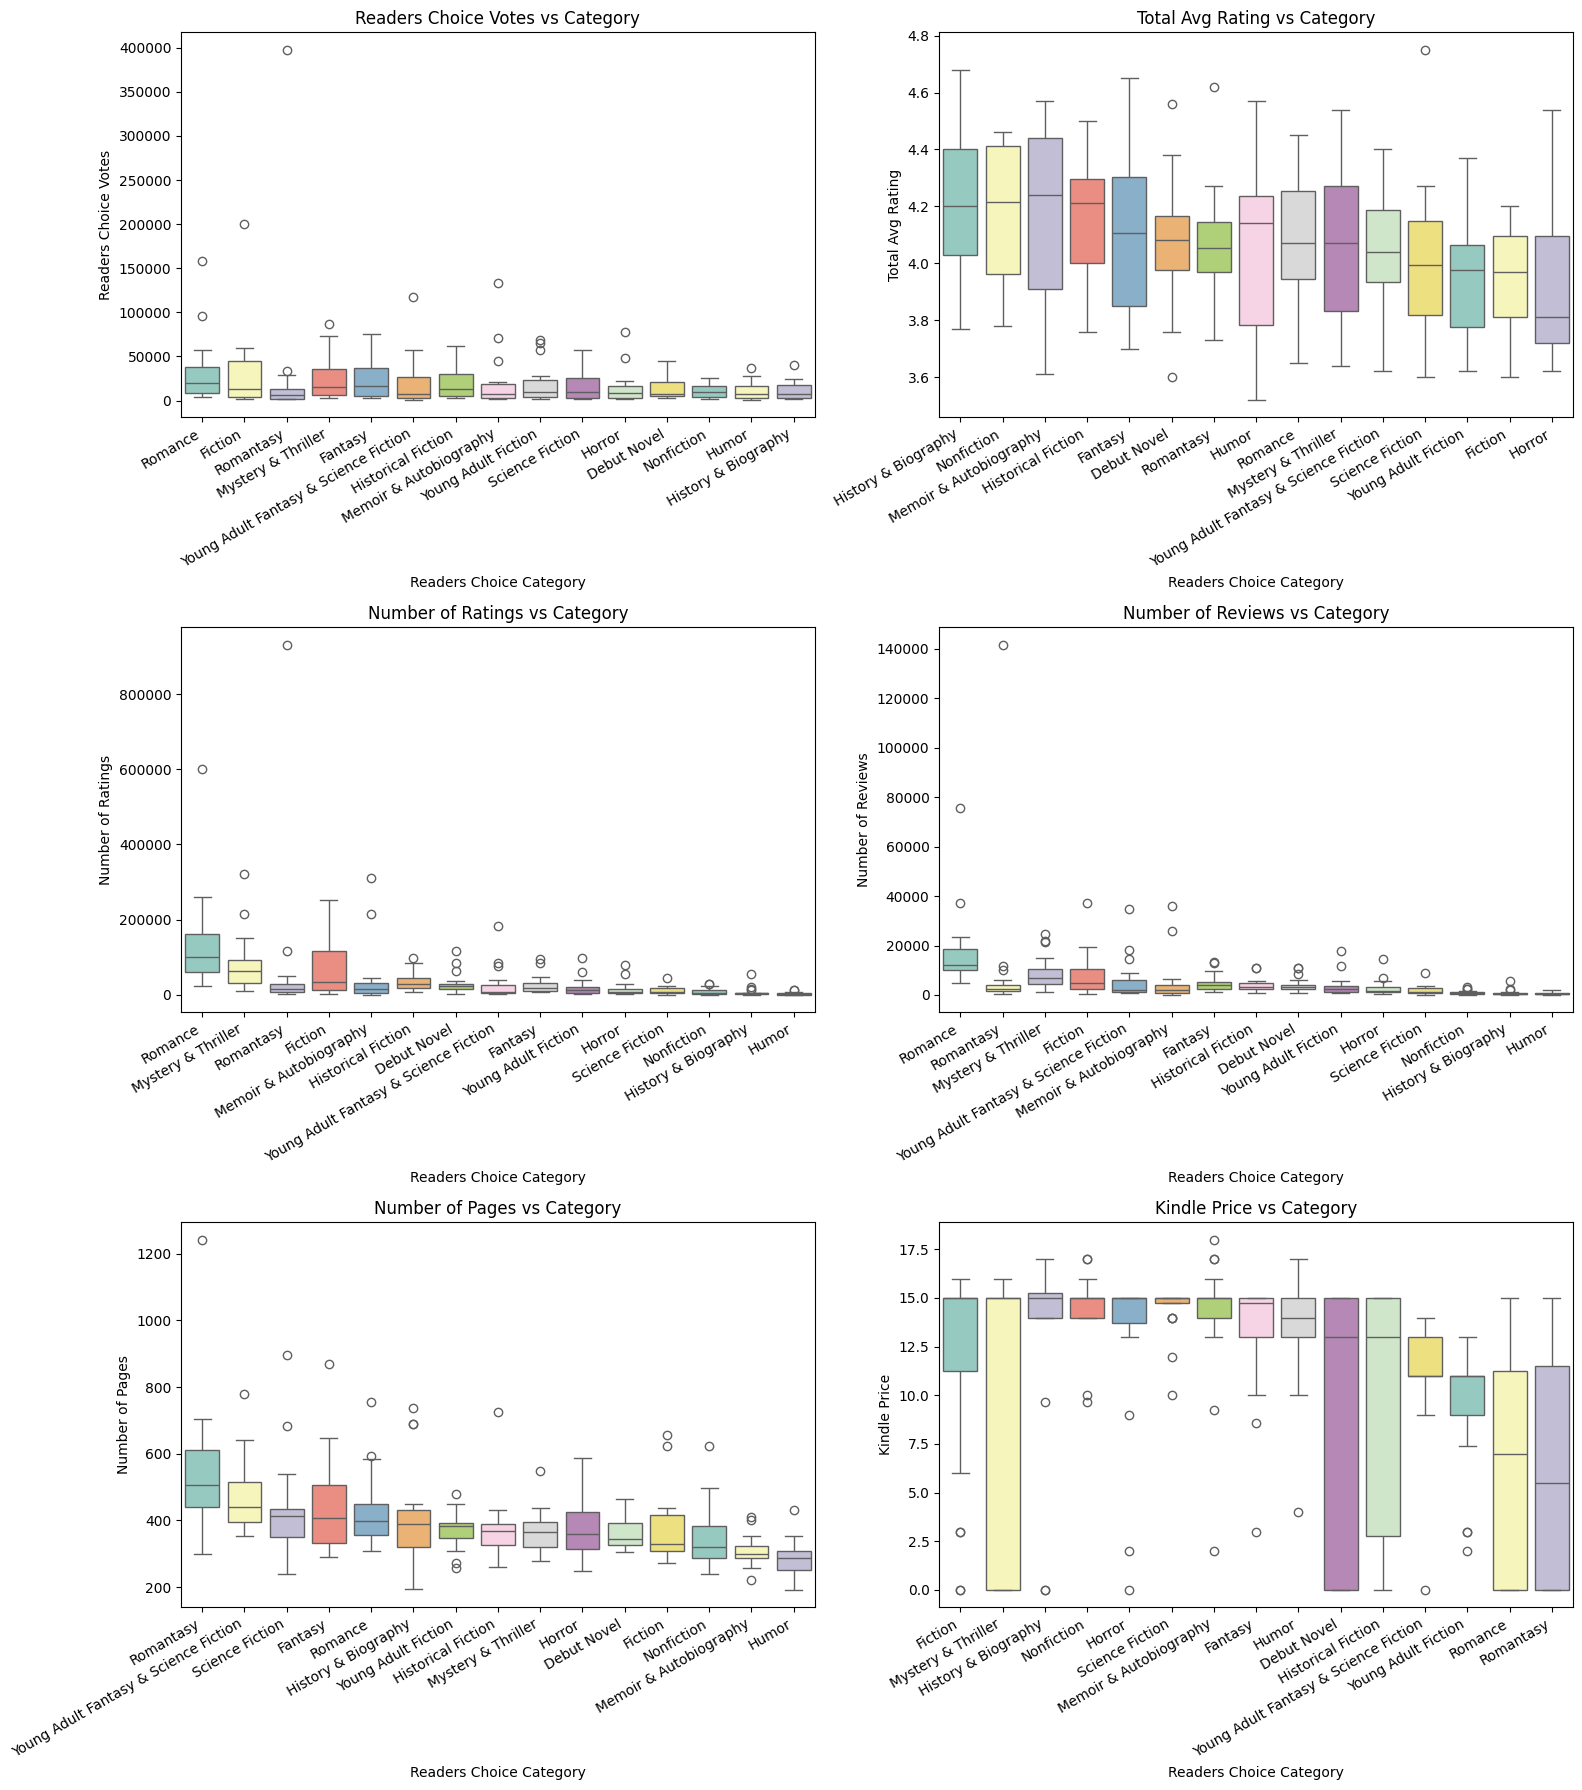

In [43]:
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

layout = {
    'Readers Choice Votes': (0, 0),
    'Total Avg Rating': (0, 1),
    'Number of Ratings': (1, 0),
    'Number of Reviews': (1, 1),
    'Number of Pages': (2, 0),
    'Kindle Price': (2, 1),
}

for column, (i, j) in layout.items():
    ax = axes[i, j]
    cols = category_vote.sort_values(by=column, ascending=False).index
    sns.boxplot(data=df, x='Readers Choice Category', y=column, palette='Set3', ax=ax, order=cols)
    ax.set_title(f'{column} vs Category')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    
fig.tight_layout()
plt.show()

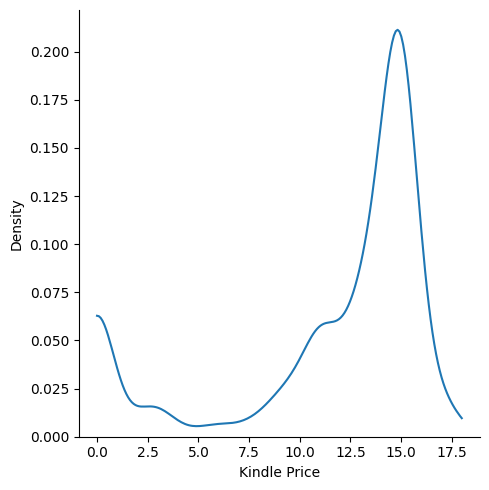

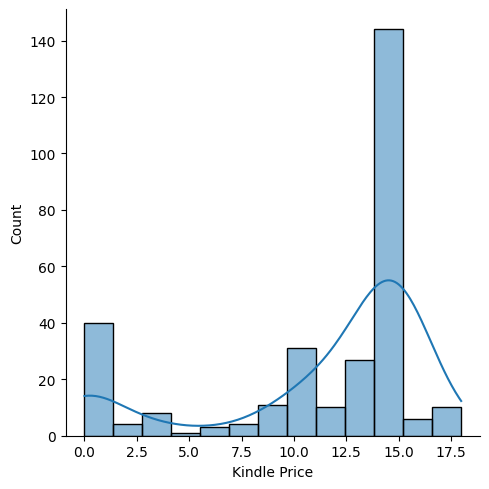

In [13]:
# bw adjust adjusts the bandwidth of the kernel.
# When you set a smaller bw_adjust, you get more contouring, but more noise
# only use small values if you think your distribution is complex
# the "cut" parameter determines how much the curve should extend beyond extreme datapoints
# we set a "0" to not show negative values in the KDE curve
sns.displot(data=df, x='Kindle Price', palette='Set3', kind='kde', bw_adjust=0.5, cut=0)

# for a pure histogram plot
# sns.displot(data=df, x='Kindle Price', palette='Set3')
sns.displot(data=df, x='Kindle Price', palette='Set3', kde=True)

plt.show()

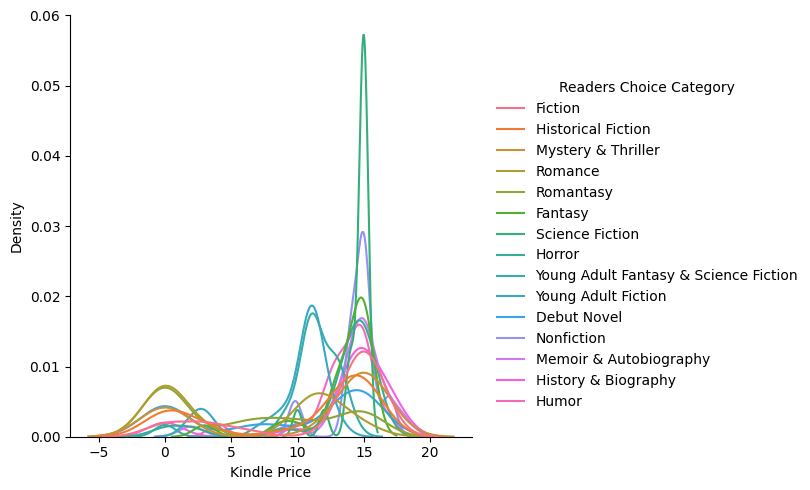

In [19]:
sns.displot(data=df, x='Kindle Price', kind='kde', hue='Readers Choice Category', bw_adjust=0.5)
plt.show()

In [15]:
print('$0 rows', df[df['Kindle Price'] == 0].shape)
df[df['Kindle Price'] == 0].head()

$0 rows (40, 13)


,Readers Choice Votes,Readers Choice Category,Title,Author,Total Avg Rating,Number of Ratings,Number of Reviews,Number of Pages,Edition,First Published date,Kindle Version and Price,Kindle Price,Kindle Version
7,21854,Fiction,Maame,Jessica George,4.08,62960,8664,320,Hardcover,31-Jan-23,Kindle Unlimited $0.00,0.0,Kindle Unlimited
8,18050,Fiction,The Collected Regrets of Clover,Mikki Brammer,4.18,37341,5989,320,Hardcover,9-May-23,Kindle Unlimited $0.00,0.0,Kindle Unlimited
20,62211,Historical Fiction,Weyward,Emilia Hart,4.12,83461,11008,329,Hardcover,2-Feb-23,Kindle Unlimited $0.00,0.0,Kindle Unlimited
25,29977,Historical Fiction,The Echo of Old Books,Barbara Davis,4.34,45487,3439,431,Kindle Edition,28-Mar-23,Kindle Unlimited $0.00,0.0,Kindle Unlimited
28,24150,Historical Fiction,Did You Hear About Kitty Karr?,Crystal Smith Paul,3.76,30281,3268,416,Hardcover,2-May-23,Kindle Unlimited $0.00,0.0,Kindle Unlimited


In [16]:
result_df

,Avg Ratings,Number of Ratings,Number of Reviews,Median Pages,Median Kindle Price
Readers Choice Category,,,,,
Romance,4.06,2737676,336747,398.0,6.99
Fiction,3.95,1288841,157445,328.0,14.99
Romantasy,4.07,1387830,203928,506.0,5.49
Mystery & Thriller,4.05,1673792,181312,365.5,14.99
Fantasy,4.10,523942,93625,407.5,14.73
Young Adult Fantasy & Science Fiction,4.04,543467,113098,440.0,10.99
Historical Fiction,4.14,692953,79846,368.0,12.99
Memoir & Autobiography,4.18,814014,99369,298.5,14.99
Young Adult Fiction,3.97,392355,73957,384.0,10.99


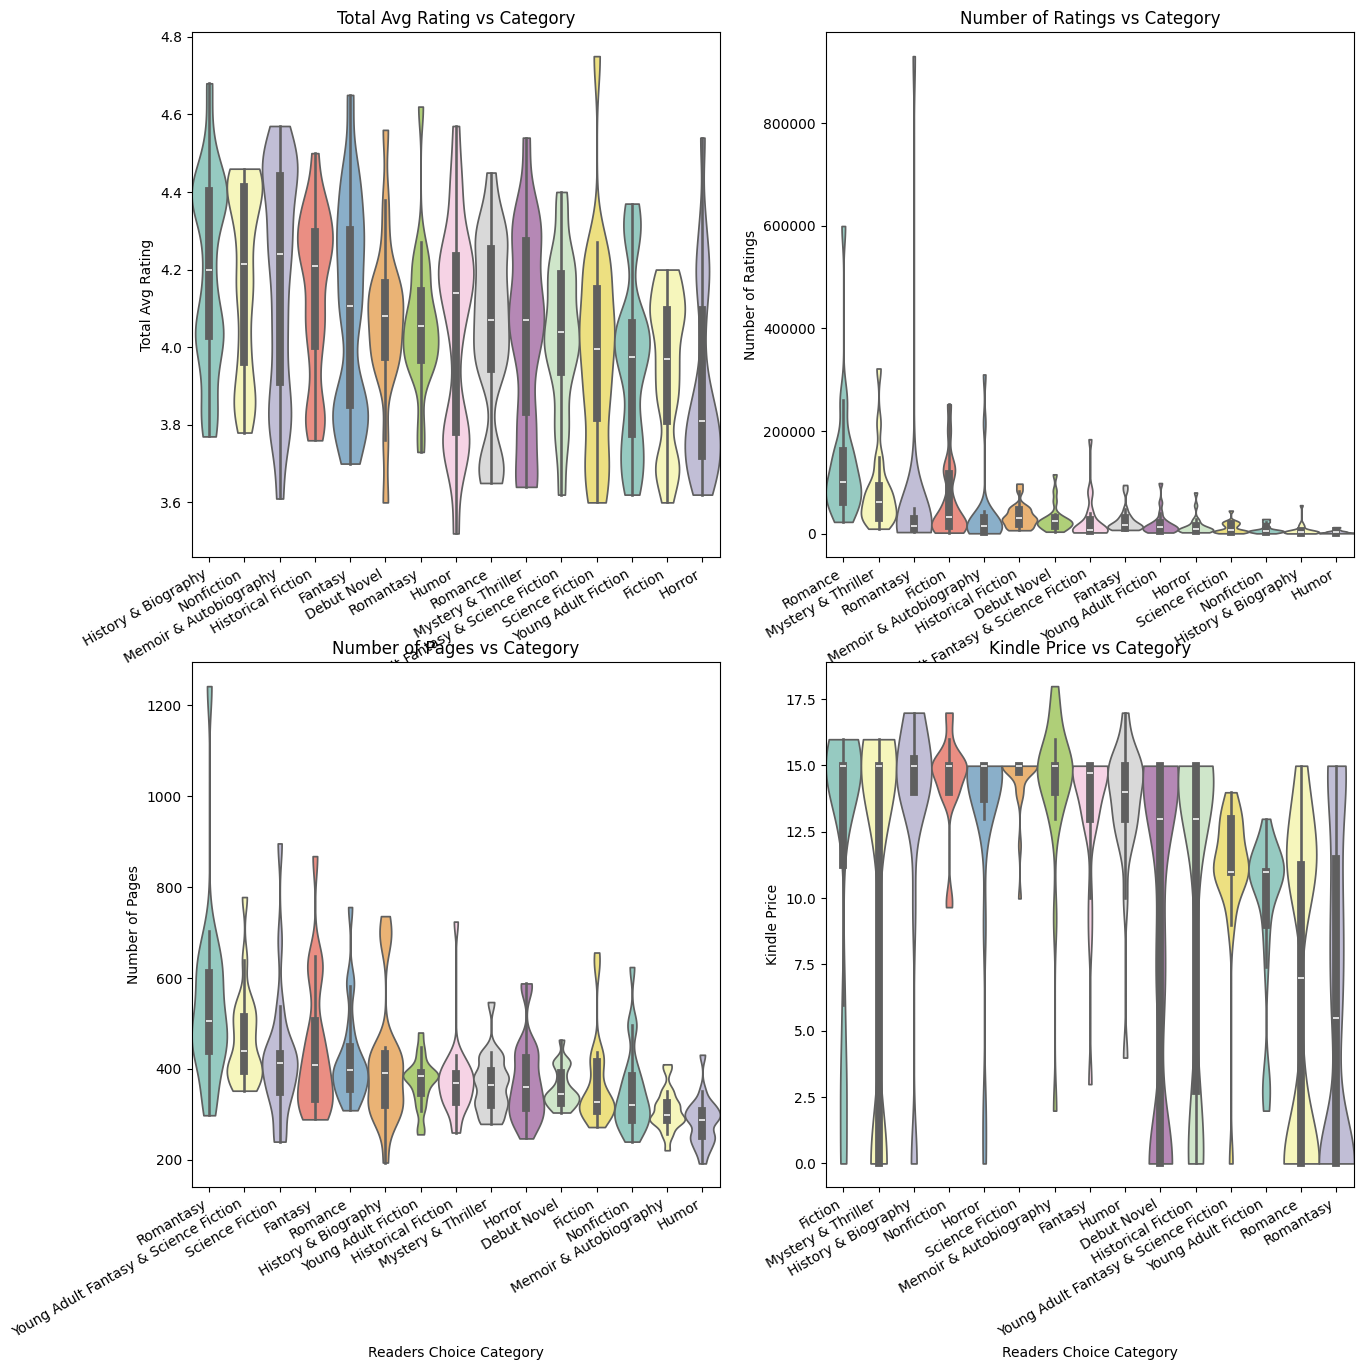

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

layout = {
    'Total Avg Rating': (0, 0),
    'Number of Ratings': (0, 1),
    'Number of Pages': (1, 0),
    'Kindle Price': (1, 1),
}

for column, (i, j) in layout.items():
    ax = axes[i, j]
    cols = category_vote.sort_values(by=column, ascending=False).index
    sns.violinplot(data=df, x='Readers Choice Category', y=column, width=1, ax=ax, palette='Set3', bw_adjust=0.5, cut=0, order=cols)
    ax.set_title(f'{column} vs Category')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

plt.show()

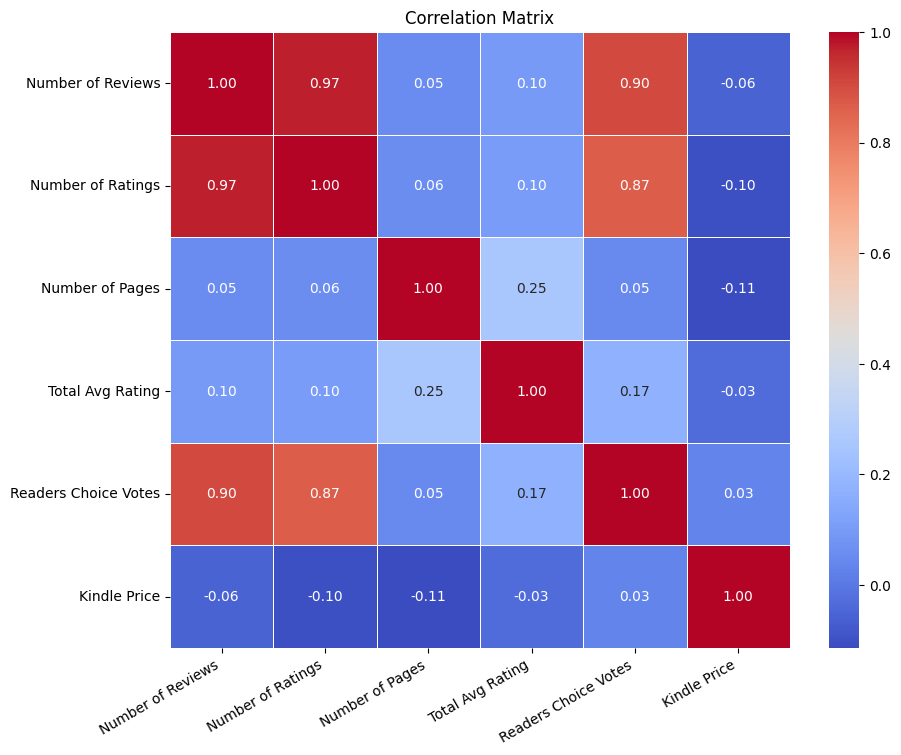

In [52]:
# Assign the columns
columns_of_interest = ['Number of Reviews', 'Number of Ratings', 'Number of Pages', 'Total Avg Rating', 'Readers Choice Votes', 'Kindle Price']

# Calculate the correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Display the correlation matrix
plt.figure(figsize=(10, 8))

# BrBG is another cool heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.xticks(rotation=30, ha='right')
plt.show()

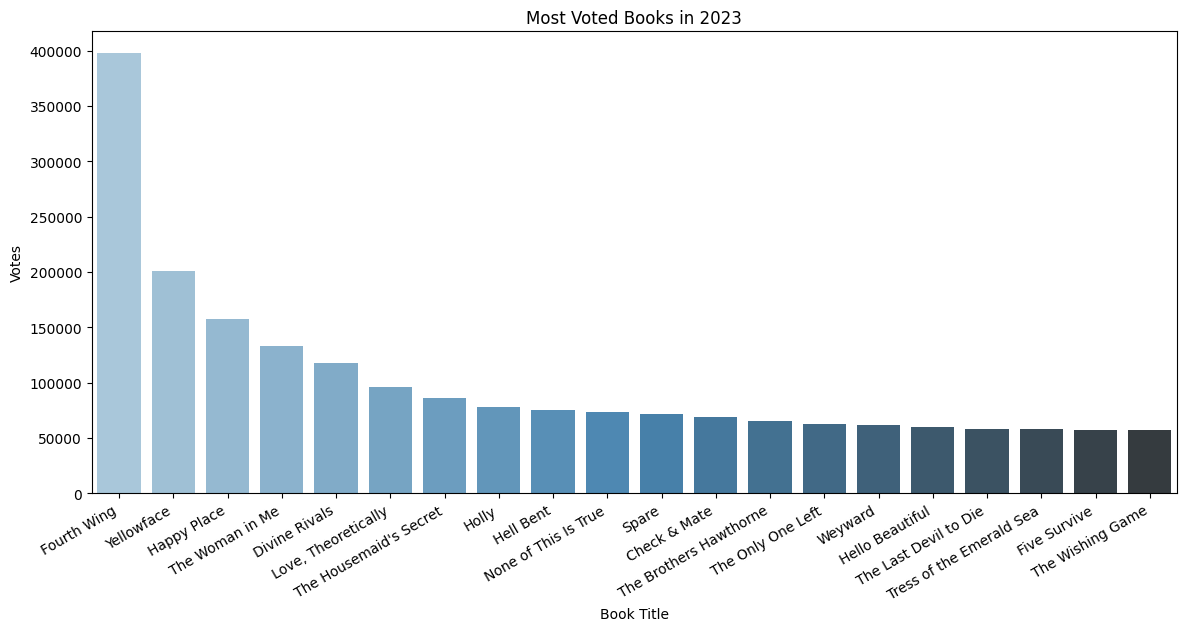

In [44]:
most_voted_books = df.sort_values(by='Readers Choice Votes', ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(most_voted_books, x='Title', y='Readers Choice Votes', palette='Blues_d')
plt.title('Most Voted Books in 2023')
plt.xlabel('Book Title')
plt.ylabel('Votes')
plt.xticks(rotation=30, ha='right')
plt.show()

In [47]:
max_votes_index = df.groupby('Readers Choice Category')['Readers Choice Votes'].idxmax()
titles_with_max_votes = df.loc[max_votes_index, ['Readers Choice Category', 'Title', 'Readers Choice Votes']].sort_values('Readers Choice Votes', ascending=False)
titles_with_max_votes

,Readers Choice Category,Title,Readers Choice Votes
80,Romantasy,Fourth Wing,397565
0,Fiction,Yellowface,200722
60,Romance,Happy Place,157687
239,Memoir & Autobiography,The Woman in Me,132867
160,Young Adult Fantasy & Science Fiction,Divine Rivals,117671
40,Mystery & Thriller,The Housemaid's Secret,86468
140,Horror,Holly,77993
100,Fantasy,Hell Bent,75800
180,Young Adult Fiction,Check & Mate,68736
20,Historical Fiction,Weyward,62211


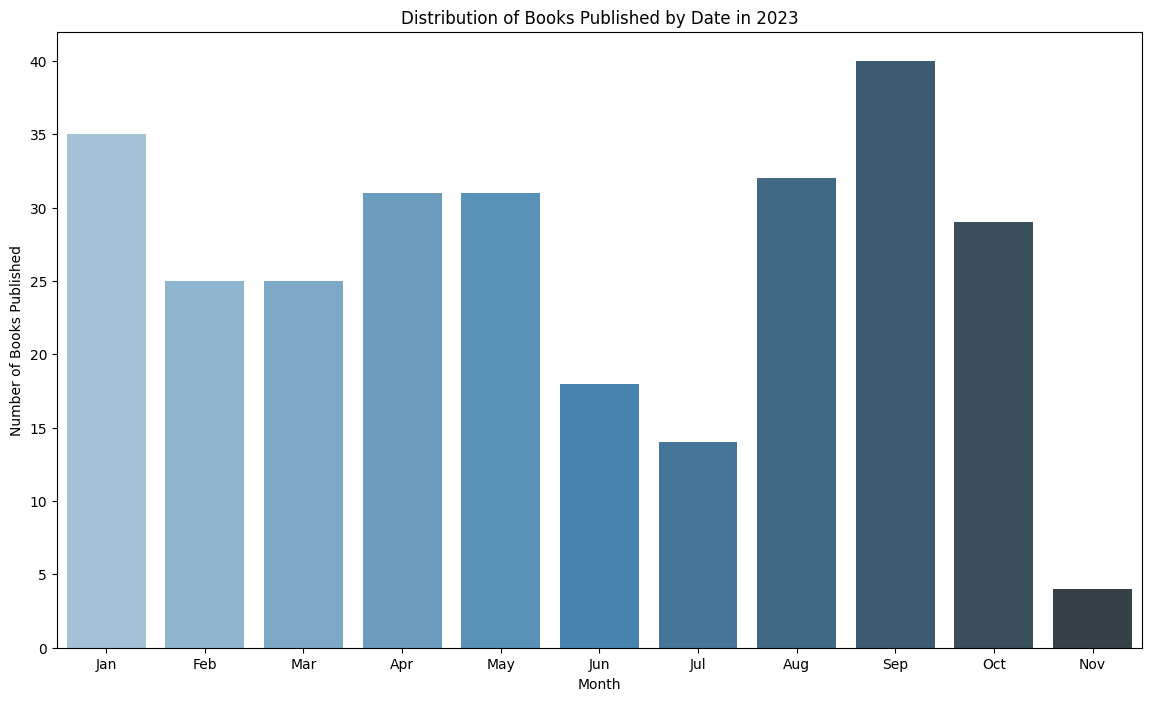

In [50]:
import calendar
df['First Published date'] = pd.to_datetime(df['First Published date'])

#Get only the books from year 2023.
books_2023 = df[df['First Published date'].dt.year == 2023]

#Count how many books released every month
books_per_month = books_2023.groupby(books_2023['First Published date'].dt.month)['Title'].count().reset_index()
books_per_month['Month'] = books_per_month['First Published date'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(14, 8))
sns.barplot(data=books_per_month, x='Month', y='Title', palette='Blues_d')
plt.title('Distribution of Books Published by Date in 2023')
plt.xlabel('Month')
plt.ylabel('Number of Books Published')
plt.show()